In [57]:
import numpy as np
   
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

def score_rocauc_mean(yLabels, yScores):
    """ Multi outpu version of ROC
    """
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    if not yLabels.ndim == 2:
        print("Error")

    if not yLabels.dtype == np.integer:
        raise

    for i in range(yLabels.shape[0]):
        fpr, tpr, thresholds = roc_curve(yLabels[i], yScores[i])
        #print(f"{i} FPR: {fpr} TPR: {tpr} {thresholds}")
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        
        try:
            fpr, tpr, thresholds = roc_curve(yLabels[i], yScores[i])
            #print(f"{i} {fpr} {tpr} {thresholds}")
            #roc_auc.append(auc(fpr, tpr))
        except:
            print("Row: %d" %i)
            y1=yLabels[i]
            print(y1)
            raise
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return np.mean(aucs)

In [55]:
yLabels = np.random.normal(size=(4,100))
yLabels = np.where(yLabels>0.2,0,1)
yScores = np.random.normal(size=(4,100))
yLabels.dtype

dtype('int64')

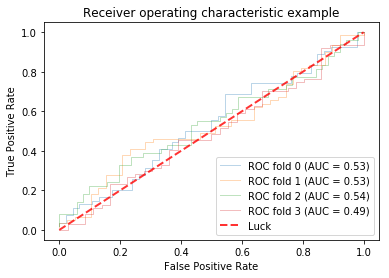

0.52375886890181156

In [56]:
score_rocauc_mean(yLabels, yScores)